# Data Mining Coursework - Spring 2023

Katerina Marie (Katya) Reichert - 33781583

I worked and submitted alone :)

# Part 2 - Credit Risk Analysis

This task is based on a real credit risk data, and is to predict a response variable Y which represents a credit card default payment (Yes = 1, No = 0), using the 23 input variables as follows:

| Variable | Description |
| :- | :- |
| X1 | Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. |
| X2 | Gender (1 = male; 2 = female). |
| X3 | Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). |
| X4 | Marital status (1 = married; 2 = single; 3 = others). |
| X5 | Age (year). |
| X6 - X11 | History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. |
| X12 - X17 | Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. |
| X18 - X23 | Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. |

### Main Task:

Using Python and any relevant libraries, you are required to build the best predictive model by tuning models using cross validation on the training dataset with each of the following algorithms discussed in this module: 

- k-Nearest Neighbours
- Decision Trees
- Random Forest
- Bagging
- AdaBoost
- SVM

Out of the models tuned with the above algorithms, select the best model and clearly justify your choice, and evaluate its performances on the test set.

Moreover, for each algorithm mentioned above, include 1 chart in the notebook illustrating how accuracy of the models vary when you vary the values of one numeric hyperparameter only (at your choice).

When working alone, only 3 out of the 6 algorithms mentioned in Part 2.

In [1]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

import sys
import os

# Prepare training data set

In [2]:
train_df = pd.read_csv(os.path.join('csv', 'creditdefault_train.csv'), header=0)
print(train_df.shape)
train_df.head()

(15000, 24)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


### Preprocess data

In [3]:
x, y = train_df.drop(columns='Y'), train_df['Y']

Normalize X-column values

In [4]:
x = (x - x.mean())/x.std()
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.133274,0.808216,0.190673,-1.064004,-1.241838,1.795894,1.778073,-0.695989,-0.665380,-1.517486,...,-0.671103,-0.672907,-0.665631,-0.653726,-0.361115,-0.238118,-0.362679,-0.302880,-0.310301,-0.288755
1,-0.902700,0.808216,0.190673,-1.064004,0.178288,0.018192,0.109252,0.135539,0.181662,0.223682,...,0.031416,-0.230618,-0.186997,-0.154726,-0.232512,-0.176421,-0.274631,-0.236211,-0.241172,-0.233506
2,-0.902700,-1.237210,0.190673,-1.064004,2.363097,-0.870659,0.109252,-0.695989,0.181662,0.223682,...,-0.163084,-0.345806,-0.349186,-0.330635,-0.232512,1.431521,0.371049,0.242596,-0.265746,-0.251241
3,-0.902700,-1.237210,-1.080482,0.848984,0.178288,0.018192,0.109252,0.135539,0.181662,0.223682,...,0.151634,-0.369956,-0.341368,-0.315553,-0.200361,-0.185884,-0.314473,-0.242272,-0.245634,-0.244556
4,2.555914,-1.237210,-1.080482,0.848984,-0.695636,0.018192,0.109252,0.135539,0.181662,0.223682,...,5.751307,7.803806,7.317449,7.350405,3.175474,1.585487,2.425487,0.923774,0.578864,0.472025


# Prepare test data set

In [5]:
test_df = pd.read_csv(os.path.join('csv', 'creditdefault_test.csv'), header=0)
print(test_df.shape)
test_df.head()

(15000, 24)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


### Preprocess data

In [6]:
x_test, y_test = test_df.drop(columns='Y'), test_df['Y']

Normalize X-column values

In [7]:
x_test = (x_test - x_test.mean())/x_test.std()
x_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-0.367253,0.812054,0.181022,0.868163,-1.034806,-0.879285,1.786526,0.142218,0.195981,0.246510,...,-0.636191,-0.621456,-0.603928,-0.597272,-0.326039,-0.205451,-0.216380,-0.247204,-0.318092,-0.183647
1,-0.599113,0.812054,0.181022,0.868163,-0.172743,0.011521,0.114219,0.142218,0.195981,0.246510,...,-0.479728,-0.450394,-0.415800,-0.392114,-0.239380,-0.184989,-0.216380,-0.247204,-0.251827,-0.011724
2,-0.212680,0.812054,1.440455,-1.050571,-0.819290,0.011521,0.114219,1.821291,0.195981,0.246510,...,-0.500600,-0.483186,-0.467444,-0.589625,-0.135994,-0.246375,-0.243641,-0.247204,-0.251827,-0.240954
3,-1.140118,-1.231363,1.440455,0.868163,-0.064985,-1.770091,-1.558089,-1.536856,-1.531742,-0.648371,...,-0.674770,-0.672068,-0.447572,-0.419445,-0.326039,-0.246375,-0.264375,0.564922,-0.243743,-0.298262
4,0.251039,0.812054,1.440455,0.868163,-0.172743,0.011521,0.114219,1.821291,0.195981,0.246510,...,-0.595151,-0.633197,-0.630560,-0.589425,-0.194395,-0.245884,-0.261975,-0.294550,-0.070393,-0.294479


# Create Predictions

Create dataframe to record prediction results

In [8]:
results_df = pd.DataFrame(test_df['Y'])
results_df.rename(columns={'Y': 'Actual'}, inplace=True)

results_df.head()

,Actual
0,1
1,0
2,0
3,0
4,0


## Model 1: K-Nearest Neighbors

In [9]:
knn_model = KNeighborsClassifier()
params = {'n_neighbors': [5,7,9,11], 'weights': ['uniform', 'distance'], 'p': [1,2] }

In [10]:
knn_gs = GridSearchCV(knn_model, params, cv=4, verbose=1)
knn_gs.fit(x, y)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [11]:
print('best params:', knn_gs.best_params_)
print('best score:', knn_gs.best_score_)

best params: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
best score: 0.806


### Define accuracy function

In [12]:
def accuracy(actual, pred):
    return sum(map(lambda x, y: int(x == y), actual, pred))/len(actual)

### Create graph to show how accuracy varies

Accuracy vs N_Neighbors for a KNN Model


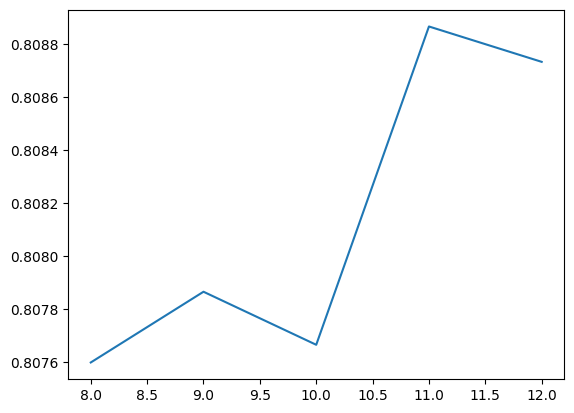

In [13]:
x_vals = [8,9,10,11,12]
accuracy_vals = []

for n in x_vals:
    knn_model = KNeighborsClassifier(n_neighbors = n)
    knn_model.fit(x,y)
    accuracy_vals.append(accuracy(y_test, knn_model.predict(x_test)))
    
print("Accuracy vs N_Neighbors for a KNN Model")
plt.plot(x_vals, accuracy_vals)

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = knn_gs.best_params_['n_neighbors'], p = knn_gs.best_params_['p'],
                                weights = knn_gs.best_params_['weights'])
knn_model.fit(x,y)

results_df['KNN'] = knn_model.predict(x_test)
results_df.head()

,Actual,KNN
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


## Model 2: Decision Tree 

In [15]:
dt_model = DecisionTreeClassifier()
params = {'max_depth': [3, 4, 5, 6, None], 'min_samples_leaf': [1, 3, 5, 7], 'max_leaf_nodes': [5, 10, 30, None]}

In [16]:
dt_gs = GridSearchCV(dt_model, params, cv=4, verbose=1)
dt_gs.fit(x,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'max_leaf_nodes': [5, 10, 30, None],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [17]:
print('best params:', dt_gs.best_params_)
print('best score:', dt_gs.best_score_)

best params: {'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 1}
best score: 0.8219333333333334


### Create graph to show how accuracy varies

Accuracy vs Max_Depth for a Decision Tree Model


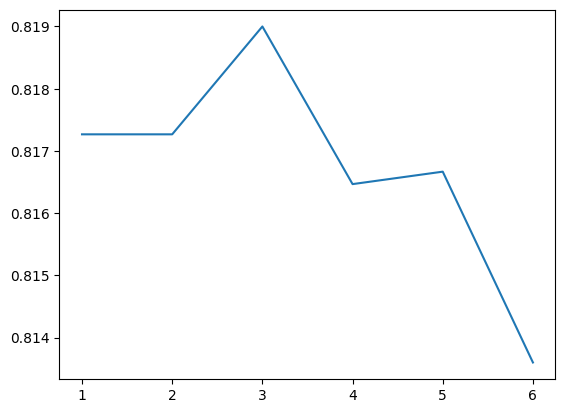

In [18]:
x_vals = [1,2,3,4,5,6]
accuracy_vals = []

for m in x_vals:
    dt_model = DecisionTreeClassifier(max_depth = m)
    dt_model.fit(x,y)
    accuracy_vals.append(accuracy(y_test, dt_model.predict(x_test)))
    
print("Accuracy vs Max_Depth for a Decision Tree Model")
plt.plot(x_vals, accuracy_vals)

Fit the Decision Tree Model with the best combination of parameters from the grid search

In [19]:
dt_model = DecisionTreeClassifier(max_depth = dt_gs.best_params_['max_depth'], 
                                  min_samples_leaf = dt_gs.best_params_['min_samples_leaf'],
                                  max_leaf_nodes = dt_gs.best_params_['max_leaf_nodes'])
dt_model.fit(x,y)

results_df['DT'] = dt_model.predict(x_test)
results_df.head()

,Actual,KNN,DT
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


## Model 3: SVM

Creating the SVM model and fixing random state parameter for repeatability

In [20]:
svm_model = svm.SVC(random_state = 3)
params = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.5, 1, 2]}

In [21]:
svm_gs = GridSearchCV(svm_model, params, cv=4, verbose=1)
svm_gs.fit(x, y)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=SVC(random_state=3),
             param_grid={'C': [0.5, 1, 2],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=1)

In [22]:
print('best params:', svm_gs.best_params_)
print('best score:', svm_gs.best_score_)

best params: {'C': 1, 'kernel': 'rbf'}
best score: 0.8184666666666667


### Create graph to show how accuracy varies

Accuracy vs C for an SVM Model


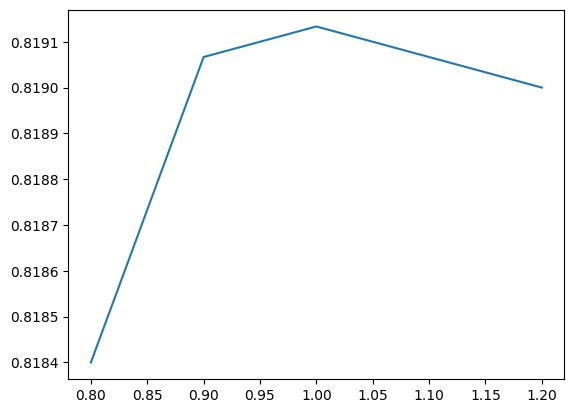

In [23]:
x_vals = [0.8,0.9,1,1.1,1.2]
accuracy_vals = []

for m in x_vals:
    svm_model = svm.SVC(C=m)
    svm_model.fit(x,y)
    accuracy_vals.append(accuracy(y_test, svm_model.predict(x_test)))
    
print("Accuracy vs C for an SVM Model")
plt.plot(x_vals, accuracy_vals)

Fit the SVM model with the best parameters from the grid search

In [24]:
svm_model = svm.SVC(C = svm_gs.best_params_['C'], kernel = svm_gs.best_params_['kernel'], random_state = 3)
svm_model.fit(x,y)

results_df['SVM'] = svm_model.predict(x_test)
results_df.head()

,Actual,KNN,DT,SVM
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


# Analyze Results

In [25]:
knn_cm = confusion_matrix(results_df['Actual'], results_df['KNN'])
dt_cm = confusion_matrix(results_df['Actual'], results_df['DT'])
svm_cm = confusion_matrix(results_df['Actual'], results_df['SVM'])

print('Classes order is 0 and 1, actual values on rows, predicted values on columns as:' +
      '\n[[True Negatives\tTrue Positives]\n[False Negatives\tFalse Positives]]\n')

print('KNN Confusion Matrix:\n', knn_cm)
print('\nDT Confusion Matrix:\n', dt_cm)
print('\nSVM Confusion Matrix:\n', svm_cm)

Classes order is 0 and 1, actual values on rows, predicted values on columns as:
[[True Negatives	True Positives]
[False Negatives	False Positives]]

KNN Confusion Matrix:
 [[11037   645]
 [ 2222  1096]]

DT Confusion Matrix:
 [[11181   501]
 [ 2240  1078]]

SVM Confusion Matrix:
 [[11212   470]
 [ 2243  1075]]


### Analysis Measures

In [26]:
def precision(df, col_name):
    actual = df.loc[df[col_name] == 1]['Actual']
    pred = df.loc[df[col_name] == 1][col_name]
    
    true_pos = sum(map(lambda x, y: int(x == y), actual, pred))/len(actual)
    false_pos = sum(map(lambda x, y: int(x != y), actual, pred))/len(actual)
    
    return true_pos/(true_pos + false_pos)


def recall(df, col_name):
    actual = df.loc[df['Actual'] == 1]['Actual']
    pred = df.loc[df['Actual'] == 1][col_name]
    
    true_pos = sum(map(lambda x, y: int(x == y), actual, pred))/len(actual)
    false_neg = sum(map(lambda x, y: int(x != y), actual, pred))/len(actual)
    
    return true_pos/(true_pos + false_neg)


def f1(df, col_name):
    p = precision(df, col_name)
    r = recall(df, col_name)
    
    return (2 * p * r)/(p + r)

## Calculate the evaluation measures

In [27]:
d = {}

for col in results_df.columns.to_list()[1:]:
    
    acc = accuracy(results_df['Actual'], results_df[col])
    prec = precision(results_df, col)
    rec = recall(results_df, col)
    f1m = f1(results_df, col)
    
    d[col] = np.round([acc, prec, rec, f1m], 3)

graph_df = pd.DataFrame(data=d, index=['Accuracy', 'Precision', 'Recall', 'F1 Measure'])
graph_df

,KNN,DT,SVM
Accuracy,0.809,0.817,0.819
Precision,0.630,0.683,0.696
Recall,0.330,0.325,0.324
F1 Measure,0.433,0.440,0.442


<Axes: >

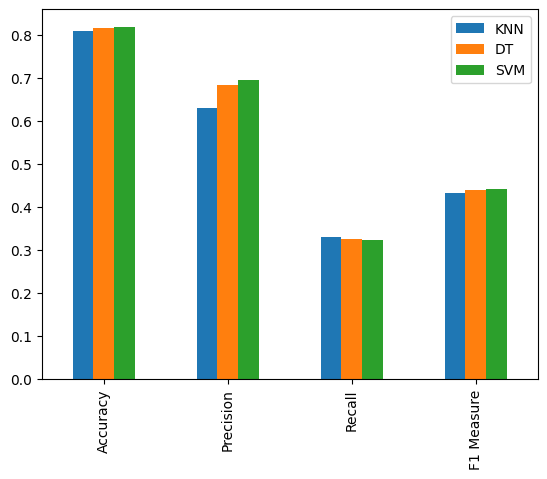

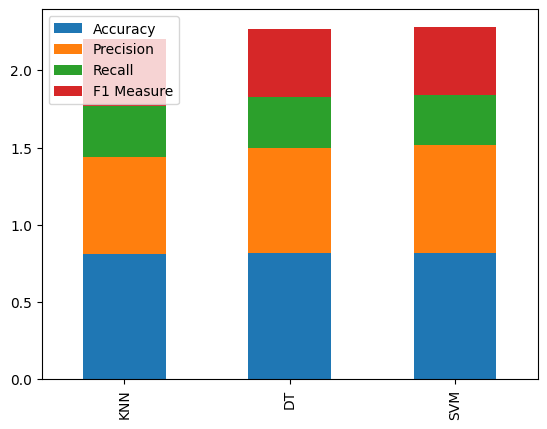

In [28]:
graph_df.plot.bar()
graph_df.T.plot.bar(stacked=True)

# Final Evaluation

All of the models perform quite similarly in accuracy, recall, and f1 measure, 
which makes them hard to choose between. 

I would say that the best model to choose is the SVM model. It has the best
performance on 3 out of the 4 measures and the highest total score. 